API Pull Using Python 

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '839d336f-6ce9-4547-86de-ca2a26c13597',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [3]:
# Check data type

type(data)

dict

In [5]:
# Import Library

import pandas as pd

# View all columns 

pd.set_option("display.max.columns", None)

# View all rows

pd.set_option("display.max.rows", None)

In [7]:
# Normalize the data 

df = pd.json_normalize(data["data"])

# Add a timestamp

df["timestamp"] = pd.to_datetime("now")

df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11755,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.976375e+07,1.976375e+07,False,NaN,1,NaN,NaN,None,2024-10-06T09:03:00.000Z,61985.626536,1.220319e+10,-53.0398,0.045422,-0.268583,-5.521602,11.194148,7.761123,6.630312,1.225069e+12,56.8325,1.301698e+12,None,2024-10-06T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-06 10:06:02.385773
1,1027,Ethereum,ETH,ethereum,9376,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203773e+08,1.203773e+08,True,NaN,2,NaN,NaN,None,2024-10-06T09:03:00.000Z,2421.054574,7.546709e+09,-41.6073,0.106057,0.073409,-8.605909,3.123604,-4.370279,-21.665566,2.914401e+11,13.5203,2.914401e+11,None,2024-10-06T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-06 10:06:02.385773
2,825,Tether USDt,USDT,tether,99427,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.196773e+11,1.213726e+11,True,NaN,3,NaN,NaN,None,2024-10-06T09:03:00.000Z,0.999989,2.687184e+10,-42.5430,-0.009205,0.003763,-0.015454,0.026682,-0.055071,0.034905,1.196760e+11,5.5519,1.213713e+11,None,2024-10-06T09:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-06 10:06:02.385773
3,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459325e+08,1.459325e+08,False,NaN,4,NaN,NaN,None,2024-10-06T09:03:00.000Z,562.655117,1.375193e+09,-11.1398,-0.010682,-0.309587,-5.495320,11.965334,13.980024,7.880911,8.210967e+10,3.8093,8.210967e+10,None,2024-10-06T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-06 10:06:02.385773
4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.685915e+08,5.859766e+08,True,NaN,5,NaN,NaN,None,2024-10-06T09:03:00.000Z,143.290991,9.092248e+08,-57.3263,0.183539,-0.831429,-8.187623,11.539839,-6.965572,1.729909,6.714494e+10,3.1149,8.396517e+10,None,2024-10-06T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-06 10:06:02.385773


In [9]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '839d336f-6ce9-4547-86de-ca2a26c13597',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Keep it in a dataframe
    
    df2 = pd.json_normalize(data["data"])
    df2["timestamp"] = pd.to_datetime("now")
    df = pd.concat([df, df2])

    # Create a csv and append data to it
    
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r"C:\Users\USER\Desktop\Coin Market Cap API\API.csv"):
        #df.to_csv(r"C:\Users\USER\Desktop\Coin Market Cap API\API.csv", header = "column_names")
    #else:df.to_csv(r"C:\Users\USER\Desktop\Coin Market Cap API\API.csv", mode = "a", header = False)

In [11]:
# Import Libraries

import os
from time import time 
from time import sleep 

# Create a timer

for i in range(333):
    api_runner()
    print("API Runner Completed Successfully")
    sleep(60)
exit()

API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully


KeyboardInterrupt: 

In [ ]:
# Read in csv file

df92 = pd.read_csv(r"C:\Users\USER\Desktop\Coin Market Cap API\API.csv")

df92.head()

In [13]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11755,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.976375e+07,1.976375e+07,False,NaN,1,NaN,NaN,None,2024-10-06T09:03:00.000Z,61985.626536,1.220319e+10,-53.0398,0.045422,-0.268583,-5.521602,11.194148,7.761123,6.630312,1.225069e+12,56.8325,1.301698e+12,None,2024-10-06T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-06 10:06:02.385773
1,1027,Ethereum,ETH,ethereum,9376,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203773e+08,1.203773e+08,True,NaN,2,NaN,NaN,None,2024-10-06T09:03:00.000Z,2421.054574,7.546709e+09,-41.6073,0.106057,0.073409,-8.605909,3.123604,-4.370279,-21.665566,2.914401e+11,13.5203,2.914401e+11,None,2024-10-06T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-06 10:06:02.385773
2,825,Tether USDt,USDT,tether,99427,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.196773e+11,1.213726e+11,True,NaN,3,NaN,NaN,None,2024-10-06T09:03:00.000Z,0.999989,2.687184e+10,-42.5430,-0.009205,0.003763,-0.015454,0.026682,-0.055071,0.034905,1.196760e+11,5.5519,1.213713e+11,None,2024-10-06T09:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-06 10:06:02.385773
3,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459325e+08,1.459325e+08,False,NaN,4,NaN,NaN,None,2024-10-06T09:03:00.000Z,562.655117,1.375193e+09,-11.1398,-0.010682,-0.309587,-5.495320,11.965334,13.980024,7.880911,8.210967e+10,3.8093,8.210967e+10,None,2024-10-06T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-06 10:06:02.385773
4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.685915e+08,5.859766e+08,True,NaN,5,NaN,NaN,None,2024-10-06T09:03:00.000Z,143.290991,9.092248e+08,-57.3263,0.183539,-0.831429,-8.187623,11.539839,-6.965572,1.729909,6.714494e+10,3.1149,8.396517e+10,None,2024-10-06T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-06 10:06:02.385773


In [15]:
# View numbers in full

pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [17]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11755,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19763753.00000,19763753.00000,False,NaN,1,NaN,NaN,None,2024-10-06T09:03:00.000Z,61985.62654,12203190998.24705,-53.03980,0.04542,-0.26858,-5.52160,11.19415,7.76112,6.63031,1225068612405.23828,56.83250,1301698157253.33008,None,2024-10-06T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-06 10:06:02.385773
1,1027,Ethereum,ETH,ethereum,9376,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120377344.45751,120377344.45751,True,NaN,2,NaN,NaN,None,2024-10-06T09:03:00.000Z,2421.05457,7546709124.69308,-41.60730,0.10606,0.07341,-8.60591,3.12360,-4.37028,-21.66557,291440120377.91187,13.52030,291440120377.90997,None,2024-10-06T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-06 10:06:02.385773
2,825,Tether USDt,USDT,tether,99427,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,119677344821.66928,121372645796.94348,True,NaN,3,NaN,NaN,None,2024-10-06T09:03:00.000Z,0.99999,26871838697.07340,-42.54300,-0.00920,0.00376,-0.01545,0.02668,-0.05507,0.03491,119676040729.83922,5.55190,121371323231.87000,None,2024-10-06T09:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-06 10:06:02.385773
3,1839,BNB,BNB,bnb,2252,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145932499.03000,145932499.03000,False,NaN,4,NaN,NaN,None,2024-10-06T09:03:00.000Z,562.65512,1375193104.97290,-11.13980,-0.01068,-0.30959,-5.49532,11.96533,13.98002,7.88091,82109667244.81892,3.80930,82109667244.82001,None,2024-10-06T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-06 10:06:02.385773
4,5426,Solana,SOL,solana,749,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,468591513.45752,585976640.52135,True,NaN,5,NaN,NaN,None,2024-10-06T09:03:00.000Z,143.29099,909224808.56720,-57.32630,0.18354,-0.83143,-8.18762,11.53984,-6.96557,1.72991,67144942205.82120,3.11490,83965173358.47000,None,2024-10-06T09:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-06 10:06:02.385773


In [19]:
# Coin trends over time

df3 = df.groupby("name", sort = False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"]].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.07934,-0.26292,-5.50711,11.18627,7.68959,7.02331
Ethereum,0.13183,0.06588,-8.59162,3.05835,-4.31535,-21.35453
Tether USDt,-0.00840,0.00119,-0.01320,0.02314,-0.09206,0.02601
BNB,-0.01065,-0.32666,-5.53628,11.93303,13.83552,7.65468
Solana,0.21980,-0.80445,-8.19514,11.57008,-7.12864,1.41324
USDC,-0.01608,0.00758,0.00884,0.01179,0.00549,0.00258
XRP,-0.19272,-0.46529,-14.98134,-0.98130,2.53530,21.42451
Dogecoin,0.06068,-0.38818,-13.83591,11.58717,9.13926,-1.64938
TRON,0.41169,-0.53665,-1.07882,3.21261,23.78255,22.06819


In [21]:
df4 = df3.stack()

df4.head()

name                                 
Bitcoin  quote.USD.percent_change_1h     0.07934
         quote.USD.percent_change_24h   -0.26292
         quote.USD.percent_change_7d    -5.50711
         quote.USD.percent_change_30d   11.18627
         quote.USD.percent_change_60d    7.68959
dtype: float64

In [23]:
type(df4)

pandas.core.series.Series

In [25]:
df5 = df4.to_frame(name = "values")

df5.head()

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.07934
        quote.USD.percent_change_24h -0.26292
        quote.USD.percent_change_7d  -5.50711
        quote.USD.percent_change_30d 11.18627
        quote.USD.percent_change_60d  7.68959

In [27]:
type(df5)

pandas.core.frame.DataFrame

In [29]:
df5.count()

values    60
dtype: int64

In [31]:
# Create an index

index = pd.Index(range(90))

df6 = df5.reset_index()

df6.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.07934
1,Bitcoin,quote.USD.percent_change_24h,-0.26292
2,Bitcoin,quote.USD.percent_change_7d,-5.50711
3,Bitcoin,quote.USD.percent_change_30d,11.18627
4,Bitcoin,quote.USD.percent_change_60d,7.68959


In [33]:
# Change column name

df7 = df6.rename(columns = {"level_1": "percent_change"})

df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.07934
1,Bitcoin,quote.USD.percent_change_24h,-0.26292
2,Bitcoin,quote.USD.percent_change_7d,-5.50711
3,Bitcoin,quote.USD.percent_change_30d,11.18627
4,Bitcoin,quote.USD.percent_change_60d,7.68959


In [35]:
df7["percent_change"] = df7["percent_change"].replace(["quote.USD.percent_change_1h", "quote.USD.percent_change_24h", "quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_60d", "quote.USD.percent_change_90d"], ["1h", "24h", "7d", "30d", "60d", "90d"])

df7.head()

,name,percent_change,values
0,Bitcoin,1h,0.07934
1,Bitcoin,24h,-0.26292
2,Bitcoin,7d,-5.50711
3,Bitcoin,30d,11.18627
4,Bitcoin,60d,7.68959


In [37]:
# Import Libraries

import seaborn as sns
import matplotlib.pyplot as plt

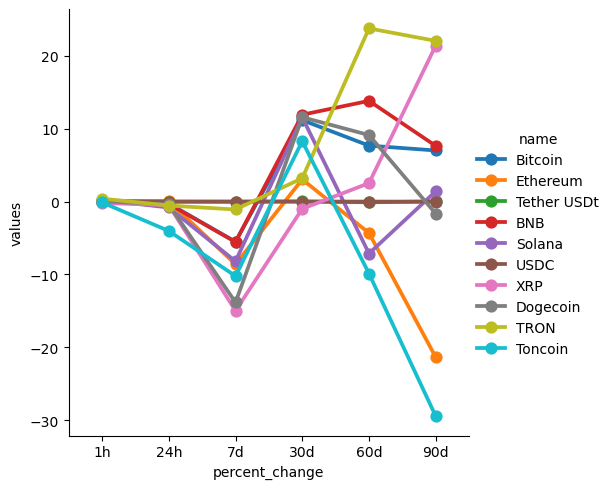

In [39]:
sns.catplot(x = "percent_change", y = "values", hue = "name", data = df7, kind = "point")

In [41]:
# Create a dataframe with column names we want 

df8 = df[["name", "quote.USD.price", "timestamp"]]

df8 = df8.query("name == 'Bitcoin'")

df8

,name,quote.USD.price,timestamp
0,Bitcoin,61985.62654,2024-10-06 10:06:02.385773
0,Bitcoin,61994.37369,2024-10-06 10:06:19.345617
0,Bitcoin,61994.37369,2024-10-06 10:07:20.547681
0,Bitcoin,61996.20231,2024-10-06 10:08:21.383809


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

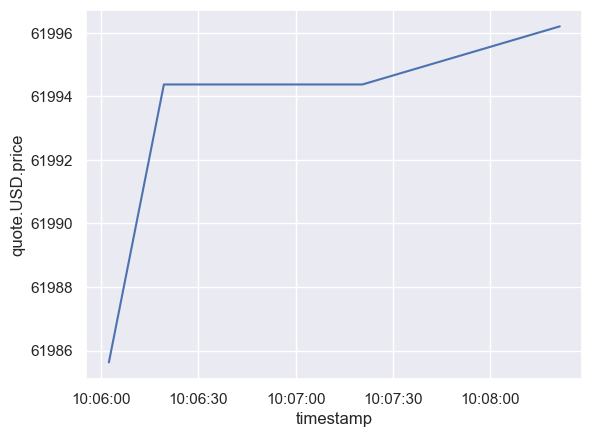

In [43]:
sns.set_theme(style = "darkgrid")

sns.lineplot(x = "timestamp", y = "quote.USD.price", data = df8)